## Description of the task
Let's consider a classic slot with 5 reels and a 5x3 playing field.
The symbols A, B, C, D, E, F, G, H, W (wild), S (free spin) appear on the reels.
The reels rotate independently of each other, all positions of each reel are equally probable.
Winning combinations are those containing 3 or more identical symbols along a winning line, starting from the leftmost symbol on the line, or starting from the rightmost symbol on the line. The W (wild) symbol can replace any symbol when forming a winning combination.

The following symbols are located on all reels except the outermost ones:
GSEDGDBWGFEAHGBCHCBFACGGEFSCAWAHEFDWCGEEGFFGHDCHGBGCHCBHDD
DBFHSWHSADCHABCDSEHBDADAEFDHGCEHDSFCAAFCHCBAFDGEFDGBECBSFEC
WSFWFEBHCDHGGGSGBHGFAHAAAFCFHBADAWDBWEBAEAEBFCWBDWCBFHESDE
EBEAG

On the outer reels, the W (wild) symbols have been removed, the remaining symbols are the same.

Paylines:  
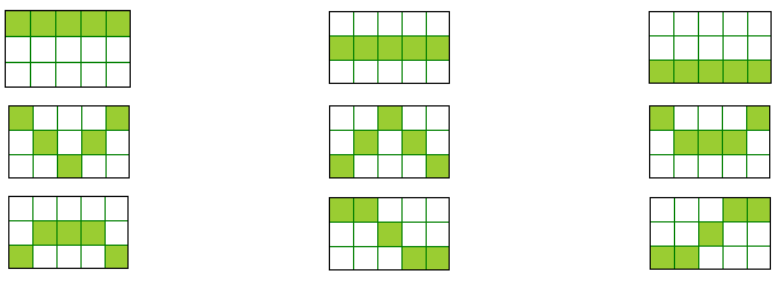


Payout table:
          A B C D E F G H  
3 characters 4 3 2 1 0.4 0.3 0.2 0.1  
4 characters 20 15 10 5 2 1.5 1 0.5  
5 characters 40 30 20 10 4 3 2 1  

When 3 or more S symbols (free spins) appear on the field, additional reel spins are awarded, during which additional winning combinations and free spins may appear.
The number of free spins awarded depends on the number of S symbols as follows:
3 symbols – 5 free spins, 4 symbols – 10 free spins, 5 symbols – 15 free spins.

A round consists of an initial spin and all subsequent free spins.

**Problem:** find the expectation and variance of the value X - the total winnings in the round. Provide the margin of error, confidence interval for these values, or make an estimate if you cannot find the exact values. If additional assumptions need to be made to find the expectation and variance of X, then formulate them explicitly.



## Abstract
The Monte Carlo method is used to generate a random sample of the winning amount.

**Description of the algorithm:**
5 random variables are generated - numbers of elements of the positions of the middles of the reels. Based on these numbers, a matrix with the game results is formed. The matrix calculates the winnings and available spins. The algorithm is repeated and the winnings are added up as long as there are available spins. Since the positions of each of the reels are equally probable, a random variable generator with a uniform distribution function is used.


Confidence intervals for variance and expectation mat are calculated using the formulas [[Link]](https://aegis4048.github.io/comprehensive_confidence_intervals_for_python_developers) assuming that the population has a 
normal form.

**Result:**
As a result of implementation, simulations of 10^4, 10^5, 10^6 games were carried out.
Calculation of mathematical expectations, dispersion and confidence intervals of these values was carried out. A graph of the distribution of games with non-zero payoff is given.



------------------------------------------------------------------------------------------


In [32]:
#Remove warnings
import warnings
warnings.simplefilter("ignore")
#Basic data analysis libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import math
import random

array([[<AxesSubplot: title={'center': '0'}>]], dtype=object)

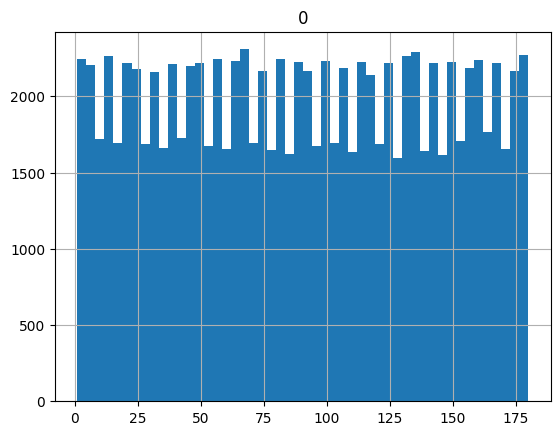

In [33]:
# Визуально проверим "равномерность" генератора
N_Games = 100000
tmp = []

for i in range(1, N_Games):
    tmp.append(random.randint(1, 180))
    
df = pd.DataFrame(tmp)
df.hist(bins=50)

In [34]:
#Параметры барабанов

#Лента центральных барабанов 
BarabanStringCenter = 'GSEDGDBWGFEAHGBCHCBFACGGEFSCAWAHEFDWCGEEGFFGHDCHGBGCHCBHDDDBFHSWHSADCHABCDSEHBDADAEFDHGCEHDSFCAAFCHCBAFDGEFDGBECBSFECWSFWFEBHCDHGGGSGBHGFAHAAAFCFHBADAWDBWEBAEAEBFCWBDWCBFHESDEEBEAG'
#Лента барабанов на краях
BarabanStringBoundary = BarabanStringCenter.replace('W', '')

# Получение матрицы 5х3 результата игры
def GameMatrixResult(S1, S2, S3, S4, S5): 
    # Подставляем входные параметры в положения массивов BarabanStringCenter и BarabanStringBoundary
    arr = [[BarabanStringBoundary[S1-1], BarabanStringCenter[S2-1], BarabanStringCenter[S3-1], BarabanStringCenter[S4-1], BarabanStringBoundary[S5-1]], 
           [BarabanStringBoundary[S1], BarabanStringCenter[S2], BarabanStringCenter[S3], BarabanStringCenter[S4], BarabanStringBoundary[S5]], 
           [BarabanStringBoundary[S1+1], BarabanStringCenter[S2+1], BarabanStringCenter[S3+1], BarabanStringCenter[S4+1], BarabanStringBoundary[S5+1]]]
    arr = np.array(arr)
    return(arr)

N_BarabanStringCenter = len(BarabanStringCenter)-1
N_BarabanStringBoundary = len(BarabanStringBoundary)-1

tmp = GameMatrixResult(1, 1, 1, 1, 1)

print('Пример одной реализации игры \n' + str(tmp))

Пример одной реализации игры 
[['G' 'G' 'G' 'G' 'G']
 ['S' 'S' 'S' 'S' 'S']
 ['E' 'E' 'E' 'E' 'E']]


In [35]:
add_spin3 = 5
add_spin4 = 10
add_spin5 = 15

def PrizeResult(MatrixResult):
    PrizeValue = 0
    add_spin = 0

    # По таблице выплат считаем выигрыш по всем линиям выплат
    # 9 линий выплат
    lines = []

    lines.append(MatrixResult[0, 0]+MatrixResult[0, 1]+MatrixResult[0, 2]+MatrixResult[0, 3]+MatrixResult[0, 4])
    lines.append(MatrixResult[1, 0]+MatrixResult[1, 1]+MatrixResult[1, 2]+MatrixResult[1, 3]+MatrixResult[1, 4])
    lines.append(MatrixResult[2, 0]+MatrixResult[2, 1]+MatrixResult[2, 2]+MatrixResult[2, 3]+MatrixResult[2, 4])

    lines.append(MatrixResult[0, 0]+MatrixResult[1, 1]+MatrixResult[2, 2]+MatrixResult[1, 3]+MatrixResult[0, 4])
    lines.append(MatrixResult[2, 0]+MatrixResult[1, 1]+MatrixResult[0, 2]+MatrixResult[1, 3]+MatrixResult[2, 4])
    lines.append(MatrixResult[0, 0]+MatrixResult[1, 1]+MatrixResult[1, 2]+MatrixResult[1, 3]+MatrixResult[0, 4])

    lines.append(MatrixResult[2, 0]+MatrixResult[1, 1]+MatrixResult[1, 2]+MatrixResult[1, 3]+MatrixResult[2, 4])
    lines.append(MatrixResult[0, 0]+MatrixResult[0, 1]+MatrixResult[1, 2]+MatrixResult[2, 3]+MatrixResult[2, 4])
    lines.append(MatrixResult[2, 0]+MatrixResult[2, 1]+MatrixResult[1, 2]+MatrixResult[0, 3]+MatrixResult[0, 4])
    #print(lines)
    

    d = {'AAAAA': 40,'AAAA': 20,'AAA': 4,   
         'BBBBB': 30, 'BBBB': 15,'BBB': 3,  
        'CCCCC': 20, 'CCCC': 10, 'CCC': 2,  
        'DDDDD': 10, 'DDDD': 5, 'DDD': 1, 
        'EEEEE': 4, 'EEEE': 2, 'EEE': 0.4,  
        'FFFFF': 3, 'FFFF': 1.5, 'FFF': 0.3, 
        'GGGGG': 2, 'GGGG': 1, 'GGG': 0.2, 
        'HHHHH': 1, 'HHHH': 0.5,'HHH': 0.1}

    #ищем шаблоны по ключам словаря
    for i in lines: 
        for j in list(d.keys()):   
            if i.find(j)!=-1:
                PrizeValue = PrizeValue + d[j]               
                #print(d[j])
                break
       
    # В зависимости от числа элементов S в матрице выберем число спинов
    # 3 символа – 5 фри-спинов, 4 символа – 10 фри-спинов, 5 символов – 15 фри-спинов  
    num_of_S = len(np.where(MatrixResult=='S')[0])
    if num_of_S == 3:
        add_spin = 5
    if num_of_S == 4:
        add_spin = 10
    if num_of_S >= 5:
        add_spin = 15        
    
    return PrizeValue, add_spin


print('Пример расчета размера приза по всем 9 линиям выплат и числа фриспинов за 1 вращение \n' )
print('Матрица игры \n' + str(tmp))      
print('Сумма выигрыша \n' + str(PrizeResult(tmp)[0])) 
print('Число начисленных фриспинов за раунд \n' + str(PrizeResult(tmp)[1])) 

Пример расчета размера приза по всем 9 линиям выплат и числа фриспинов за 1 вращение 

Матрица игры 
[['G' 'G' 'G' 'G' 'G']
 ['S' 'S' 'S' 'S' 'S']
 ['E' 'E' 'E' 'E' 'E']]
Сумма выигрыша 
6
Число начисленных фриспинов за раунд 
15


In [36]:
from scipy import stats
# Блок симуляции игры (Game Simulation - название функции)
N_Games = [10000, 100000, 1000000]
X = []

for m in N_Games:
    for i in range(1, m):
        available_num_spin = 1
        PrizeValuePerGame = 0
        # Пока число доступных прокруток >1
        k = 0 #счетчик игр
        while available_num_spin > 0:
            # Генерируется 5 случайных чисел: 3 от 1 до N_BarabanStringCenter, 2 от 1 до N_BarabanStringBoundary
            Baraban_1 = random.randint(1, N_BarabanStringBoundary-1)
            Baraban_2 = random.randint(1, N_BarabanStringCenter-1)
            Baraban_3 = random.randint(1, N_BarabanStringCenter-1)
            Baraban_4 = random.randint(1, N_BarabanStringCenter-1)
            Baraban_5 = random.randint(1, N_BarabanStringBoundary-1)

            MatrixOfGame = GameMatrixResult(Baraban_1, Baraban_2, Baraban_3, Baraban_4, Baraban_5)
            PrizeValuePerSpin, add_spin = PrizeResult(MatrixOfGame)        
            available_num_spin = available_num_spin - 1 + add_spin
            PrizeValuePerGame = PrizeValuePerGame + PrizeValuePerSpin
            k = k + 1
        #print('Игра номер '+str(i) + ' Выигрыш ' + str(PrizeValuePerGame) + ' Число оборотов ' + str(k))
        X.append(PrizeValuePerGame)
                
    df = pd.DataFrame(X, columns =['Winning for 1 game']) 
    alpha = 0.05                       # significance level = 5%
    t = stats.t.ppf(1 - alpha/2, m-1)   # t-critical value for 95% CI = 2.093
    
    tmp = df['Выигрыш за 1 игру'].mean()*t/math.sqrt(m)
    leftmean_confidence_interval = df['Winning for 1 game'].mean()-tmp
    rightmean_confidence_interval = df['Winning for 1 game'].mean()+tmp
  
    alpha = 0.05  # significance level = 5%
    s2 = df['Winning for 1 game'].var()   # sample variance
    leftvar_confidence_interval = (m - 1) * s2 / stats.chi2.ppf(alpha / 2, m - 1)
    rightvar_confidence_interval = (m - 1) * s2 / stats.chi2.ppf(1 - alpha / 2, m - 1)
     
    print('Число генерируемых игр N='+str(m))
    print('Выборочное среднее ' + str(df['Winning for 1 game'].mean()))
    print('Левая граница 95%  доверительного интервала среднего ' + str(leftmean_confidence_interval))
    print('Правая граница 95% доверительного интервала  среднего ' + str(rightmean_confidence_interval)) 
    
    print('Выборочная дисперсия ' + str(df['Winning for 1 game'].var()))
    print('Левая граница 95% доверительного интервала дисперсии ' + str(leftvar_confidence_interval))
    print('Правая граница 95% доверительного интервала дисперсии ' + str(rightvar_confidence_interval)) 

    #print('Медиана ' + str(df['Выигрыш за 1 игру'].median()))
        
  

Число генерируемых игр N=10000
Выборочное среднее 0.6166616661666173
Левая граница 95%  доверительного интервала среднего 0.6045738563941507
Правая граница 95% доверительного интервала  среднего 0.6287494759390839
Выборочная дисперсия 5.57873416347481
Левая граница 95% доверительного интервала дисперсии 5.736661761236303
Правая граница 95% доверительного интервала дисперсии 5.4272676819881545
Число генерируемых игр N=100000
Выборочное среднее 0.6746077201403782
Левая граница 95%  доверительного интервала среднего 0.6704264843947076
Правая граница 95% доверительного интервала  среднего 0.6787889558860487
Выборочная дисперсия 7.224620369865694
Левая граница 95% доверительного интервала дисперсии 7.288366688914616
Правая граница 95% доверительного интервала дисперсии 7.161710493515802
Число генерируемых игр N=1000000
Выборочное среднее 0.6793081422742708
Левая граница 95%  доверительного интервала среднего 0.6779767211695018
Правая граница 95% доверительного интервала  среднего 0.68063956

Таким образом мат. ожидание равно примерно 0.67, дисперсия лежит в интервале от 7 до 7.3

<AxesSubplot: >

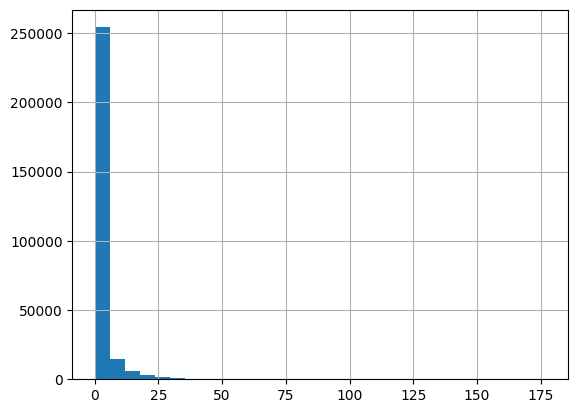

In [37]:
#распределение ненулевых выигрышей
df_tmp = df['Winning for 1 game'][df['Winning for 1 game']>0.01]
display(df_tmp[df['Winning for 1 game']<1000].hist(bins=30))  

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Выигрыш за 1 игру,1109997.0,0.679308,2.669005,0.0,0.0,0.0,0.1,177.0


## Accounting for distribution imbalance

### Box-Cox transformation

,count,mean,std,min,25%,50%,75%,max,Median
Выигрыш за 1 игру,280868.0,2.684642,4.771691,0.1,0.3,1.0,3.0,177.0,1.0


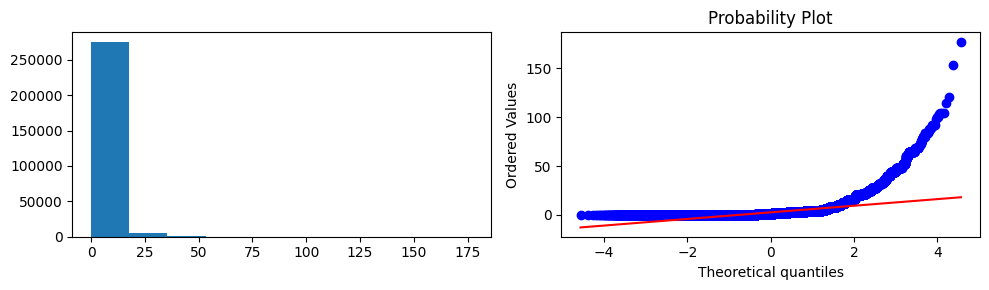

In [39]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# generate non-normal sample
x = df['Winning for 1 game'][df['Winning for 1 game']>0]

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(x)
stats.probplot(x, dist=stats.norm, plot=axes[1])
fig.tight_layout()

# summary statistics
df1 = pd.DataFrame(x).describe().T
df1['Median'] = np.median(x)
df1

,count,mean,std,min,25%,50%,75%,max,Median
0,280868.0,0.072384,1.418568,-2.291465,-1.200928,0.0,1.101156,5.232938,0.0


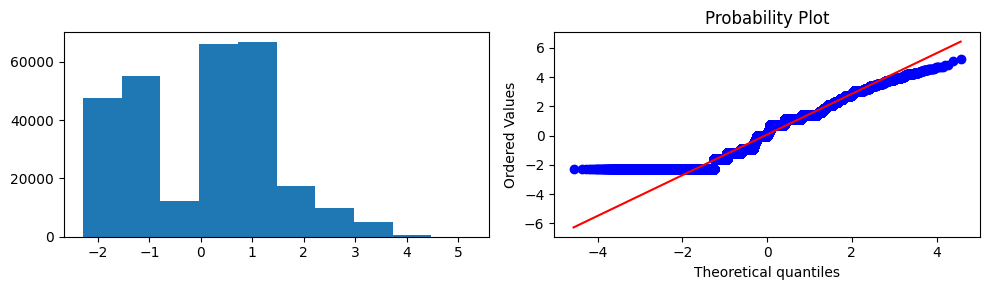

In [40]:
xt, lmbda = stats.boxcox(x)
# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(xt)
stats.probplot(xt, dist=stats.norm, plot=axes[1])
fig.tight_layout()

# summary statistics
df1 = pd.DataFrame(xt).describe().T
df1['Median'] = np.median(xt)
df1

The transformation does not provide a significant approximation to the normal law even if the zeros are removed

### Bootstrap

In [41]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# simulation settings
NUM_SAMPLES = 1000
SAMPLE_SIZE = 100
BOOT_SAMPLE_SIZE = 100

# analytical confidence interval of mean
def ci_mean_analytic(arr, alpha):
    return stats.t.interval(1 - alpha, len(arr) - 1, loc=np.mean(arr), scale=stats.sem(arr))

# bootstrap confidence interval of mean
def ci_mean_boot(arr, p_lo, p_hi, r=BOOT_SAMPLE_SIZE):
    boot_var = [np.mean(np.random.choice(arr, len(arr))) for _ in range(r)]
    lo = np.percentile(boot_var, p_lo)
    hi = np.percentile(boot_var, p_hi)
    return (lo, hi)

# analytical confidence interval of variance
def ci_var_analytic(arr, alpha):
    lo, hi = (
        (len(arr) - 1) * np.var(arr, ddof=1) / stats.chi2.ppf(1 - alpha / 2, len(arr) - 1),
        (len(arr) - 1) * np.var(arr, ddof=1) / stats.chi2.ppf(alpha / 2, len(arr) - 1)
    )
    return (lo, hi)

# bootstrap confidence interval of variance
def ci_var_boot(arr, p_lo, p_hi, r=BOOT_SAMPLE_SIZE):
    boot_var = [np.var(np.random.choice(arr, len(arr)), ddof=1) for _ in range(r)]
    lo = np.percentile(boot_var, p_lo)
    hi = np.percentile(boot_var, p_hi)
    return (lo, hi)

# check if the confidence interval includes the population parameter
def coverage_test(lo, hi, target):
    if lo <= target <= hi:
        return 1
    else:
        return 0

# define population
pop = df['Выигрыш за 1 игру']
# population mean
mean_pop = np.mean(pop)
# population variance
var_pop = np.var(pop, ddof=0)

# initialize
count_mean_norm_analytic, count_mean_analytic, count_mean_skew_analytic, count_mean_lognorm_analytic = [], [], [], []
count_mean_norm_boot, count_mean_boot, count_mean_skew_boot, count_mean_lognorm_boot = [], [], [], []
count_var_norm_analytic, count_var_analytic, count_var_skew_analytic, count_var_lognorm_analytic = [], [], [], []
count_var_norm_boot, count_var_boot, count_var_skew_boot, count_var_lognorm_boot = [], [], [], []

for i in range(NUM_SAMPLES):
    # randomly draw samples from population
    samp = np.random.choice(pop, SAMPLE_SIZE)
    # 95% ANALYTICAL confidence interval of MEAN
    mean_lo_analytic, mean_hi_analytic = ci_mean_analytic(samp, 0.05)
    # 95% BOOTSTRAP confidence interval of MEAN
    mean_lo_boot, mean_hi_boot = ci_mean_boot(samp, 2.5, 97.5)
    # 95% ANALYTICAL confidence interval of VARIANCE
    var_lo_analytic, var_hi_analytic = ci_var_analytic(samp, 0.05)
    # 95% BOOSTRAP confidence interval of VARIANCE
    var_lo_boot, var_hi_boot = ci_var_boot(samp, 2.5, 97.5)

    # coverage test for ANALYTICAL CI of MEAN
    count_mean_analytic.append(coverage_test(mean_lo_analytic, mean_hi_analytic, mean_pop))
    # coverage test for BOOTSTRAP CI of MEAN
    count_mean_boot.append(coverage_test(mean_lo_boot, mean_hi_boot, mean_pop))
    # coverage test for ANALYTICAL CI of VARIANCE
    count_var_analytic.append(coverage_test(var_lo_analytic, var_hi_analytic, var_pop))
    # coverage test for BOOTSTRAP CI of VARIANCE
    count_var_boot.append(coverage_test(var_lo_boot, var_hi_boot, var_pop))

    
print()
print('###########################################################')
print('                     Coverage Test (%)                     ')
print('###########################################################')
print()
print()
#print('------------------ Parametric CI of mean ------------------')
#print()
#print('{:<40}  {:>15} %'.format(' ', round(sum(count_mean_analytic) / NUM_SAMPLES * 100, 1)))
#print()
print('------------------ Non-parametric CI of mean --------------')
print()
print('{:<40}  {:>15} %'.format(' ', round(sum(count_mean_boot) / NUM_SAMPLES * 100, 1)))
print()
#print('---------------- Parametric CI of variance ----------------')
#print()
#print('{:<40}  {:>15} %'.format(' ', round(sum(count_var_analytic) / NUM_SAMPLES * 100, 1)))
print()
print('---------------- Non-parametric CI of variance ------------')
print()
print('{:<40}  {:>15} %'.format(' ', round(sum(count_var_boot) / NUM_SAMPLES * 100, 1)))



###########################################################
                     Coverage Test (%)                     
###########################################################


------------------ Non-parametric CI of mean --------------

                                                     81.7 %


---------------- Non-parametric CI of variance ------------

                                                     60.5 %
